In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
from matplotlib.patches import Rectangle
from flydance.io.smart_loader import FlyData
from flydance.vr.neuser import NeuserParams
from flydance.vr.neuser import FollowBarWatch
import sys
import os
sys.path.append("/Users/ambra-stella/flydance/experiments")

In [3]:
fname = "/Users/ambra-stella/bachelor/analysis/wt/big_summary_positive_until_distractor.csv" # SPECIFY WHAT DISTRACTOR LIST
df1 = pd.read_csv(fname)

In [4]:
fname = "/Users/ambra-stella/bachelor/analysis/TNTin/big_summary_negative.csv" # SPECIFY WHAT DISTRACTOR LIST
df2 = pd.read_csv(fname)

In [5]:
fname = "/Users/ambra-stella/bachelor/analysis/TNTin/big_summary_positive_until_distractor.csv" # SPECIFY WHAT DISTRACTOR LIST
df3 = pd.read_csv(fname)

In [6]:
fname = "/Users/ambra-stella/bachelor/analysis/TNTe/big_summary_negative.csv" # SPECIFY WHAT DISTRACTOR LIST
df4 = pd.read_csv(fname)

In [7]:
fname = "/Users/ambra-stella/bachelor/analysis/TNTe/big_summary_positive_until_distractor.csv" # SPECIFY WHAT DISTRACTOR LIST
df5 = pd.read_csv(fname)

/Users/ambra-stella/opt/anaconda3/envs/flyvenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# load file:

In [8]:
#wt, TNTin, TNTe
#big_summary_negative 
#big_summary_positive
#big_summary_positive_until_distractor

fname = "/Users/ambra-stella/bachelor/analysis/wt/big_summary_negative.csv" # SPECIFY WHAT DISTRACTOR LIST
df0 = pd.read_csv(fname)


In [71]:
use_df = df2

In [72]:

use_df = use_df.drop_duplicates()
use_df = use_df.reset_index(drop=True)
use_df

,frame,timestamp,x,y,xvel,yvel,t,x_px,y_px,orientation_radians_mod_pi,contrast,luminance,center_x,center_y,fly_number,walking_angle,speed
0,100487,1.623928e+09,-0.084591,-0.009391,0.012288,-0.006424,30.133153,206.9,463.9,-0.725,2.0,0.0,0.422213,0.327022,20210617_130836,-0.481725,0.013866
1,100488,1.623928e+09,-0.084220,-0.009559,0.011418,-0.004951,30.166629,208.8,463.1,-0.683,2.0,0.0,0.422205,0.327052,20210617_130836,-0.409100,0.012445
2,100498,1.623928e+09,-0.084146,-0.010761,-0.002407,-0.035360,30.499872,209.2,456.9,1.562,2.0,0.0,0.421692,0.329600,20210617_130836,-1.638763,0.035442
3,100499,1.623928e+09,-0.084740,-0.012162,-0.022771,-0.046027,30.533235,206.1,449.7,1.234,2.0,0.0,0.421130,0.329882,20210617_130836,-2.030217,0.051351
4,100500,1.623928e+09,-0.085856,-0.013413,-0.038097,-0.037359,30.566507,200.4,443.3,1.014,2.0,0.0,0.418559,0.330050,20210617_130836,-2.365973,0.053358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316444,207003,1.625581e+09,0.006119,0.007782,-0.001218,-0.013183,1017.096552,671.3,551.8,1.435,2.0,0.0,0.535632,0.514181,20210706_160203,-1.662953,0.013239
316445,207004,1.625581e+09,0.006064,0.007330,-0.001788,-0.013662,1017.129889,671.0,549.5,1.448,2.0,0.0,0.535632,0.514181,20210706_160203,-1.700951,0.013778
316446,207005,1.625581e+09,0.005964,0.006815,-0.003321,-0.015899,1017.163245,670.5,546.9,1.452,2.0,0.0,0.535632,0.514181,20210706_160203,-1.776727,0.016243
316447,207024,1.625581e+09,0.005127,0.006056,-0.008902,-0.007767,1017.796563,666.3,543.0,0.859,2.0,0.0,0.535632,0.514181,20210706_160203,-2.424194,0.011814


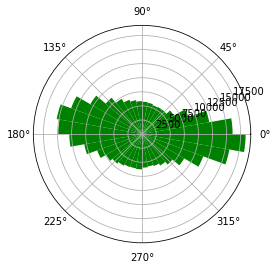

In [73]:
ax = plt.subplot(111, polar=True)
ax.hist(use_df.walking_angle, bins=36, facecolor='g');
#ax.set_title('Distribution of TNTe flies walking angles', fontsize=20)
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/TNTe_polar_big_summary_positive_until_distractor.pdf")

In [62]:
len(use_df)

303992

In [63]:
#bad = ['20210701_141424']
no_artifacts = use_df.loc[(use_df.fly_number != '20210701_141424')&(use_df.fly_number != '20210630_155725')]
use_df = no_artifacts 

# creates data for the box plot: 

In [74]:

list_flies = use_df['fly_number'].to_list()
#print('flies:', list_flies)
list_flies = set(list_flies)
#print('flies:', list_flies)
print('flies type:', type(list_flies))
list_flies = list(list_flies)
list_flies = [x for x in list_flies if str(x) != 'nan']
print('flies:', list_flies)
print(len(list_flies))

flies type: <class 'set'>
flies: ['20210617_130836', '20210618_122803', '20210706_144658', '20210621_170022', '20210617_141709', '20210618_140636', '20210702_130824', '20210618_130146', '20210706_160203', '20210617_150749', '20210628_144628', '20210617_154010', '20210702_152610', '20210622_152246']
14


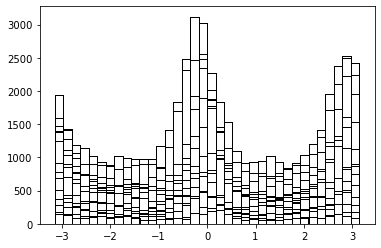

In [75]:
# use_df = df
# list_flies = use_df['fly_number'].tolist()
# list_flies = set(list_flies)
# list_flies = list(list_flies)
# #print('flies:', list_flies)


#single_fly_histogram_data = []
single_fly_histogram_bins = []
single_fly_histogram_counts = []
# single_fly_histogram_data = np.array(())
# print(single_fly_histogram_data)

for flies in list_flies:
        fly = use_df[use_df.fly_number == flies]
        histogram_data = plt.hist(fly.walking_angle, 36, fill=False);
        counts, bins, bars = plt.hist(fly.walking_angle,36, fill=False)
        #print(histogram_data)
        #print(flies)
        #print('fly i need to know:', flies == 5)
        #print(counts)
        
        single_fly_histogram_bins.append (bins)
        single_fly_histogram_counts.append(counts)   ############## has all direction counts of every fly in an arrays (sorted from left to right)
        #single_fly_histogram_data.append(histogram_data)

        
        #np.append(single_fly_histogram_data,histogram_data, axis = 0)
        
angle_list = []                                     ################# has all the counts per flies per direction sorted from left to right
for flies in range(len(bins)):
    arr = []
    angle_list.append(arr)
#print(angle_list)

for i in range(len(single_fly_histogram_counts)):
    array = single_fly_histogram_counts[i]
    #print(len(array))
    for j in range(len(array)):
        #print(j)
        cunt = array[j]
        #print(cunt)
    
        #print(type(angle_list))
        angle_list[j].append(cunt)
        #print(new_array)       


#  creates box plot:

(0.0, 37.0)

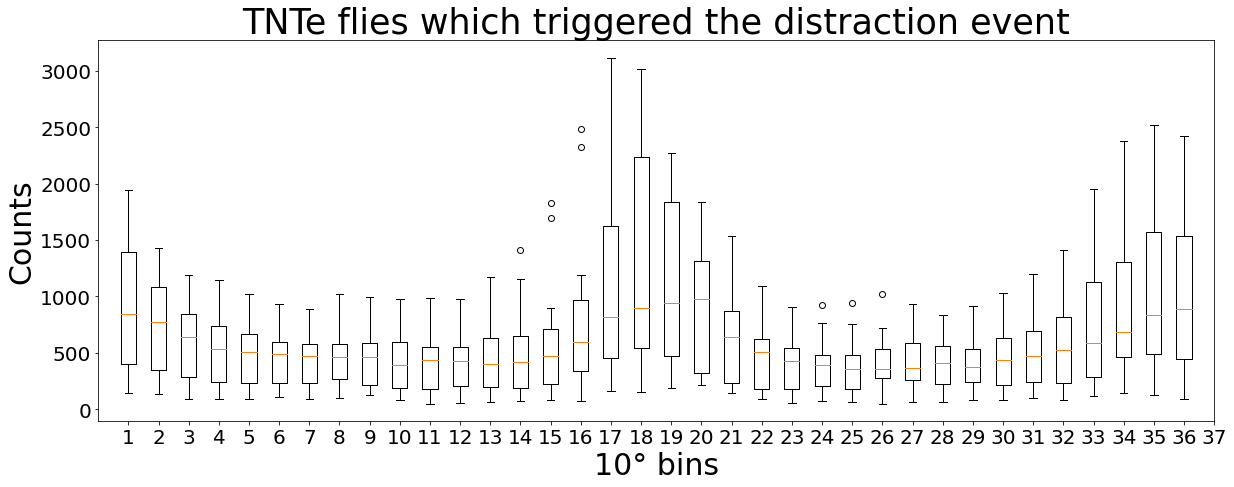

In [76]:
fig, ax = plt.subplots(figsize=(20,7))
#plt.figure(figsize=(15,20))
plt.boxplot(angle_list);

ax.set_ylabel('Counts', fontsize=30)
ax.set_xlabel('10° bins', fontsize=30)
ax.set_title('TNTe flies which triggered the distraction event', fontsize=35)
ax.tick_params(axis='both', labelsize = 20)
plt.xlim(0, 37)
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/TNTe_boxplot_big_summary_positive_until_distractor.pdf")

In [106]:
len(single_fly_histogram_bins)

14

In [78]:

#len(angle_list)
#angle_list = angle_list.remove(angle_list[36])
del angle_list[-1]
print(angle_list)
print(len(angle_list))

[[1476.0, 369.0, 1403.0, 286.0, 1594.0, 1377.0, 912.0, 687.0, 145.0, 1250.0, 173.0, 1942.0, 776.0, 515.0], [1105.0, 330.0, 1413.0, 256.0, 1279.0, 907.0, 852.0, 427.0, 142.0, 1034.0, 139.0, 1433.0, 698.0, 395.0], [772.0, 318.0, 1192.0, 253.0, 1071.0, 671.0, 775.0, 270.0, 150.0, 864.0, 91.0, 995.0, 612.0, 432.0], [742.0, 311.0, 1143.0, 218.0, 900.0, 575.0, 732.0, 204.0, 121.0, 734.0, 93.0, 757.0, 488.0, 339.0], [728.0, 348.0, 1025.0, 200.0, 898.0, 538.0, 680.0, 187.0, 119.0, 585.0, 95.0, 640.0, 473.0, 327.0], [705.0, 327.0, 883.0, 173.0, 934.0, 548.0, 617.0, 204.0, 157.0, 532.0, 110.0, 474.0, 506.0, 307.0], [695.0, 310.0, 892.0, 156.0, 866.0, 557.0, 591.0, 202.0, 105.0, 465.0, 92.0, 504.0, 478.0, 315.0], [590.0, 272.0, 1023.0, 152.0, 821.0, 464.0, 581.0, 272.0, 123.0, 463.0, 97.0, 563.0, 465.0, 282.0], [603.0, 204.0, 997.0, 139.0, 852.0, 477.0, 675.0, 234.0, 123.0, 552.0, 122.0, 526.0, 445.0, 310.0], [543.0, 188.0, 977.0, 159.0, 889.0, 400.0, 616.0, 186.0, 99.0, 576.0, 82.0, 601.0, 386.0

# trying to create a index for each fly in each of the four groups:

In [80]:
# neg_triggered_index_df = pd.DataFrame()
# neg_triggered_index_df['genotype'] = ''
# neg_triggered_index_df['side'] = ''
# neg_triggered_index_df['APD'] = ''
neg_triggered_index_df

,genotype,side,APD
0,TNTe,left,0.091560
1,TNTe,left,0.030536
2,TNTe,left,0.149074
3,TNTe,left,0.064121
4,TNTe,left,0.003288
...,...,...,...
67,TNTin,right,0.411735
68,TNTin,right,0.366971
69,TNTin,right,0.352434
70,TNTin,right,0.126129


In [79]:
gt = 'TNTin'

TNTe_index_list = []
for i in range(len(single_fly_histogram_counts)):
    arr = []
    TNTe_index_list.append(arr)
#print('wt_angle_list:',wt_angle_list)

TNTe_index_array = []


percentage_per_bin_per_fly = []
for i in range(len(single_fly_histogram_counts)):
    arr = []
    percentage_per_bin_per_fly.append(arr)
print('percentage_per_bin_per_fly:',percentage_per_bin_per_fly)

sum_list = []
for j in range(len(single_fly_histogram_counts)):
    summ = sum(single_fly_histogram_counts[j])
    sum_list.append(summ)
print('sum_list:',sum_list)
    
for k in range(len(single_fly_histogram_counts)):
    sub_list = single_fly_histogram_counts[k]
    for o in range(len(sub_list)):
        bin_count = sub_list[o]
        percentage = bin_count / sum_list[k]
        percentage_per_bin_per_fly[k].append(percentage)

#print(percentage_per_bin_per_fly)
print('number of flies:', len(percentage_per_bin_per_fly))
#print(angle_list_sum_list)
#print(percentage_per_bin)


for a in range(len(percentage_per_bin_per_fly)):
    sub_list = percentage_per_bin_per_fly[a]

    bins_of_interest = [sub_list[0], sub_list[35]]
    #print(bins_of_interest)
    bins_not_of_interest = sub_list
# #print(len(bins_not_of_interest))
    del bins_not_of_interest[0]
    del bins_not_of_interest[34]
# # print(bins_not_of_interest)
# # print(len(bins_not_of_interest))
    APD_right =  (sum(bins_of_interest)/len(bins_of_interest) *10)-(sum(bins_not_of_interest)/len(bins_not_of_interest) *10)
# print(sum(bins_of_interest),len(bins_of_interest), sum(bins_not_of_interest), len(bins_not_of_interest))
    #print('APD_right:', APD_right)
    #TNTe_index_list[a].append(APD_right)
    side = 'left'
    thing = pd.DataFrame([[gt, side, APD_right]], columns = ['genotype','side','APD'])
    neg_triggered_index_df = neg_triggered_index_df.append(thing,ignore_index=True)
    #print('thing:',thing)
    

for a in range(len(percentage_per_bin_per_fly)):
    sub_list = percentage_per_bin_per_fly[a]

    bins_of_interest = [sub_list[16], sub_list[17]]
    #print(bins_of_interest)
    bins_not_of_interest = sub_list
# #print(len(bins_not_of_interest))
    del bins_not_of_interest[16]
    del bins_not_of_interest[16]
# # print(bins_not_of_interest)
# # print(len(bins_not_of_interest))
    APD_left =  (sum(bins_of_interest)/len(bins_of_interest) *10)-(sum(bins_not_of_interest)/len(bins_not_of_interest) *10)
    side = 'right'
    other_thing = pd.DataFrame([[gt, side, APD_left]], columns = ['genotype','side','APD'])
    neg_triggered_index_df = neg_triggered_index_df.append(other_thing,ignore_index=True)

percentage_per_bin_per_fly: [[], [], [], [], [], [], [], [], [], [], [], [], [], []]
sum_list: [34130.0, 10582.0, 39001.0, 7895.0, 47143.0, 27044.0, 25729.0, 11882.0, 4483.0, 28789.0, 4079.0, 42312.0, 19598.0, 13782.0]
number of flies: 14


(0.0, 0.9)

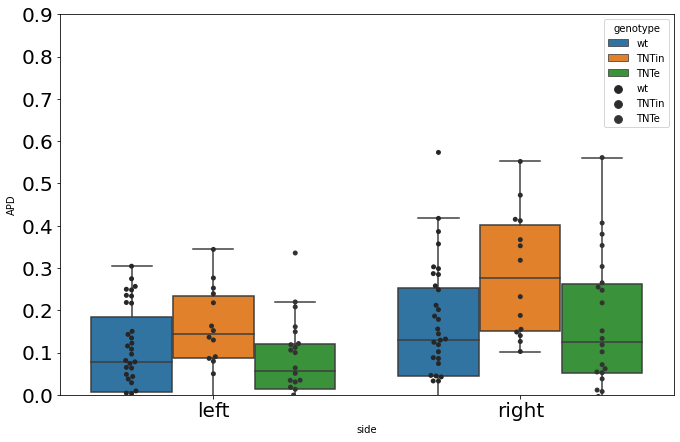

In [245]:
fig, ax = plt.subplots(figsize=(11,7))
ax = sns.boxplot(x = 'side',y = 'APD', hue = 'genotype', data=neg_triggered_index_df, fliersize=0)
ax = sns.swarmplot(x = 'side',y = 'APD', hue = 'genotype', data = neg_triggered_index_df, dodge=True, color=".2")
ax.tick_params(axis='both', labelsize = 20)
plt.ylim(0.0, 0.9)

In [43]:
# pos_triggered_index_df = pd.DataFrame()
# pos_triggered_index_df['genotype'] = ''
# pos_triggered_index_df['side'] = ''
# pos_triggered_index_df['APD'] = ''
pos_triggered_index_df

,genotype,side,APD


In [94]:
neg_right = scipy.stats.ttest_ind(neg_TNTin_right_APD, neg_TNTe_right_APD, axis=0)
print('neg_right:', neg_right)

neg_left = scipy.stats.ttest_ind(neg_TNTin_left_APD, neg_TNTe_left_APD, axis=0)
print('neg_left:', neg_left)

pos_right = scipy.stats.ttest_ind(pos_TNTin_right_APD, pos_TNTe_right_APD, axis=0)
print('pos_right:', pos_right)

pos_left = scipy.stats.ttest_ind(pos_TNTin_left_APD, pos_TNTe_left_APD, axis=0)
print('pos_left:', pos_left)

neg_right: Ttest_indResult(statistic=2.2144759220270025, pvalue=0.03360183904352117)
neg_left: Ttest_indResult(statistic=2.4167166643629105, pvalue=0.021176725373386475)
pos_right: Ttest_indResult(statistic=3.936357236458316, pvalue=0.0009677516253387005)
pos_left: Ttest_indResult(statistic=1.8070517203832528, pvalue=0.08749917853212037)


In [93]:
pos_TNTin_left = pos_triggered_index_df.loc[(pos_triggered_index_df.side == 'left') & (pos_triggered_index_df.genotype == 'TNTin')]
pos_TNTin_left_APD = pos_TNTin_left.APD
pos_TNTin_right = pos_triggered_index_df.loc[(pos_triggered_index_df.side == 'right') & (pos_triggered_index_df.genotype == 'TNTin')]
pos_TNTin_right_APD = pos_TNTin_right.APD

pos_TNTe_left = pos_triggered_index_df.loc[(pos_triggered_index_df.side == 'left') & (pos_triggered_index_df.genotype == 'TNTe')]
pos_TNTe_left_APD = pos_TNTe_left.APD
pos_TNTe_right = pos_triggered_index_df.loc[(pos_triggered_index_df.side == 'right') & (pos_triggered_index_df.genotype == 'TNTe')]
pos_TNTe_right_APD = pos_TNTe_right.APD

In [81]:
neg_triggered_index_df

,genotype,side,APD
0,TNTe,left,0.091560
1,TNTe,left,0.030536
2,TNTe,left,0.149074
3,TNTe,left,0.064121
4,TNTe,left,0.003288
...,...,...,...
67,TNTin,right,0.411735
68,TNTin,right,0.366971
69,TNTin,right,0.352434
70,TNTin,right,0.126129


In [58]:
pos_triggered_index_df

,genotype,side,APD
0,TNTe,left,0.145310
1,TNTe,left,0.354560
2,TNTe,left,0.271343
3,TNTe,left,0.172683
4,TNTe,left,0.065874
5,TNTe,left,0.293560
6,TNTe,left,0.063498
7,TNTe,left,0.201227
8,TNTe,left,0.178763
9,TNTe,left,0.134287


In [57]:
gt = 'TNTin'

TNTe_index_list = []
for i in range(len(single_fly_histogram_counts)):
    arr = []
    TNTe_index_list.append(arr)
#print('wt_angle_list:',wt_angle_list)

TNTe_index_array = []


percentage_per_bin_per_fly = []
for i in range(len(single_fly_histogram_counts)):
    arr = []
    percentage_per_bin_per_fly.append(arr)
print('percentage_per_bin_per_fly:',percentage_per_bin_per_fly)

sum_list = []
for j in range(len(single_fly_histogram_counts)):
    summ = sum(single_fly_histogram_counts[j])
    sum_list.append(summ)
print('sum_list:',sum_list)
    
for k in range(len(single_fly_histogram_counts)):
    sub_list = single_fly_histogram_counts[k]
    for o in range(len(sub_list)):
        bin_count = sub_list[o]
        percentage = bin_count / sum_list[k]
        percentage_per_bin_per_fly[k].append(percentage)

#print(percentage_per_bin_per_fly)
print('number of flies:', len(percentage_per_bin_per_fly))
#print(angle_list_sum_list)
#print(percentage_per_bin)


for a in range(len(percentage_per_bin_per_fly)):
    sub_list = percentage_per_bin_per_fly[a]

    bins_of_interest = [sub_list[0], sub_list[35]]
    #print(bins_of_interest)
    bins_not_of_interest = sub_list
# #print(len(bins_not_of_interest))
    del bins_not_of_interest[0]
    del bins_not_of_interest[34]
# # print(bins_not_of_interest)
# # print(len(bins_not_of_interest))
    APD_right =  (sum(bins_of_interest)/len(bins_of_interest) *10)-(sum(bins_not_of_interest)/len(bins_not_of_interest) *10)
# print(sum(bins_of_interest),len(bins_of_interest), sum(bins_not_of_interest), len(bins_not_of_interest))
    #print('APD_right:', APD_right)
    #TNTe_index_list[a].append(APD_right)
    side = 'left'
    thing = pd.DataFrame([[gt, side, APD_right]], columns = ['genotype','side','APD'])
    pos_triggered_index_df = pos_triggered_index_df.append(thing,ignore_index=True)
    print('thing:',thing)
    

for a in range(len(percentage_per_bin_per_fly)):
    sub_list = percentage_per_bin_per_fly[a]

    bins_of_interest = [sub_list[16], sub_list[17]]
    #print(bins_of_interest)
    bins_not_of_interest = sub_list
# #print(len(bins_not_of_interest))
    del bins_not_of_interest[16]
    del bins_not_of_interest[16]
# # print(bins_not_of_interest)
# # print(len(bins_not_of_interest))
    APD_left =  (sum(bins_of_interest)/len(bins_of_interest) *10)-(sum(bins_not_of_interest)/len(bins_not_of_interest) *10)
    side = 'right'
    other_thing = pd.DataFrame([[gt, side, APD_left]], columns = ['genotype','side','APD'])
    pos_triggered_index_df = pos_triggered_index_df.append(other_thing,ignore_index=True)



percentage_per_bin_per_fly: [[], [], [], [], [], [], [], [], []]
sum_list: [1465.0, 2778.0, 6520.0, 596.0, 5273.0, 1377.0, 2011.0, 4495.0, 1227.0]
number of flies: 9
thing:   genotype  side       APD
0    TNTin  left  0.027505
thing:   genotype  side       APD
0    TNTin  left  0.395757
thing:   genotype  side       APD
0    TNTin  left  0.368459
thing:   genotype  side       APD
0    TNTin  left  0.372088
thing:   genotype  side       APD
0    TNTin  left  0.354469
thing:   genotype  side       APD
0    TNTin  left  0.182622
thing:   genotype  side       APD
0    TNTin  left  0.124463
thing:   genotype  side       APD
0    TNTin  left  0.383105
thing:   genotype  side       APD
0    TNTin  left  0.245218


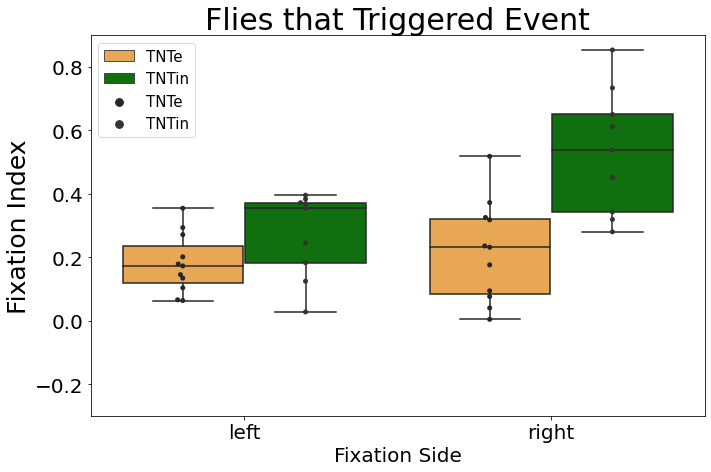

In [104]:
colors = ["#ffaa3b", "g", '#4d4d4d']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(11,7))
ax = sns.boxplot(x = 'side',y = 'APD', hue = 'genotype', data=pos_triggered_index_df, fliersize=0)
ax = sns.swarmplot(x = 'side',y = 'APD', hue = 'genotype', data = pos_triggered_index_df, dodge=True, color=".2")
ax.tick_params(axis='both', labelsize = 20)
plt.ylim(-0.3, 0.9)
ax.legend(fontsize=15)

ax.set_title('Flies that Triggered Event', fontsize=30)
ax.set_ylabel('Fixation Index', fontsize=25)
ax.set_xlabel('Fixation Side', fontsize=20)
plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/fixation_index_positive.pdf")


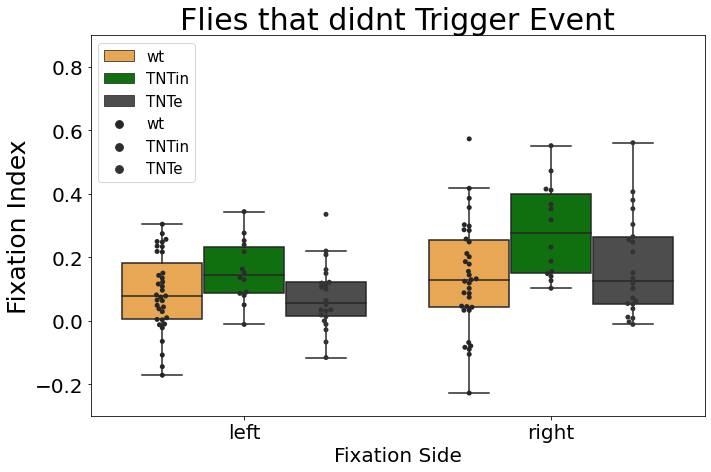

In [270]:
colors = ["#ffaa3b", "g", '#4d4d4d']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(11,7))
ax = sns.boxplot(x = 'side',y = 'APD', hue = 'genotype', data=neg_triggered_index_df, fliersize=0)
ax = sns.swarmplot(x = 'side',y = 'APD', hue = 'genotype', data = neg_triggered_index_df, dodge=True, color=".2")
ax.tick_params(axis='both', labelsize = 20)
plt.ylim(-0.3, 0.9)
ax.legend(fontsize=15)
ax.set_title('Flies that didnt Trigger Event', fontsize=30)
ax.set_ylabel('Fixation Index', fontsize=25)
ax.set_xlabel('Fixation Side', fontsize=20)
plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/fixation_index_negative.pdf")

# creates an index for each group of flies with total count in that direction:

In [354]:
#wt_angle_list = []
#TNTin_angle_list = []
#TNTe_angle_list = []

percentage_per_bin = []
angle_list_sum_list = []
for i in range(len(angle_list)):
    angle_list_sum = sum(angle_list[i])
    angle_list_sum_list.append(angle_list_sum)
    
for j in range(len(angle_list_sum_list)):
    percentage = angle_list_sum_list[j] / len(use_df)
    percentage_per_bin.append(percentage)
print(angle_list_sum_list)
print(percentage_per_bin)



bins_of_interest = [percentage_per_bin[0], percentage_per_bin[35]]
# print(bins_of_interest)
bins_not_of_interest = percentage_per_bin
#print(len(bins_not_of_interest))
del bins_not_of_interest[0]
del bins_not_of_interest[34]
# print(bins_not_of_interest)
# print(len(bins_not_of_interest))
APD_right =  (sum(bins_of_interest)/len(bins_of_interest) *10)-(sum(bins_not_of_interest)/len(bins_not_of_interest) *10)
print(sum(bins_of_interest),len(bins_of_interest), sum(bins_not_of_interest), len(bins_not_of_interest))
print('APD_right:', APD_right)
pTNTe.append(APD_right)


bins_of_interest = [percentage_per_bin[16], percentage_per_bin[17]]
# print(bins_of_interest)
bins_not_of_interest = percentage_per_bin
# print(len(bins_not_of_interest))
del bins_not_of_interest[16]
del bins_not_of_interest[16]
# print(bins_not_of_interest)
# print(len(bins_not_of_interest))
APD_left =  (sum(bins_of_interest)/len(bins_of_interest) *10)-(sum(bins_not_of_interest)/len(bins_not_of_interest) *10)
print('APD_left:', APD_left)
pTNTe.append(APD_left)

# bins_of_interest = [percentage_per_bin[8], percentage_per_bin[9]]
# # print(bins_of_interest)
# bins_not_of_interest = percentage_per_bin
# # print(len(bins_not_of_interest))
# del bins_not_of_interest[8]
# del bins_not_of_interest[8]
# # print(bins_not_of_interest)
# # print(len(bins_not_of_interest))
# APD_up =  (sum(bins_of_interest)/len(bins_of_interest) *10)-(sum(bins_not_of_interest)/len(bins_not_of_interest) *10)
# print('APD_up:', APD_up)


# bins_of_interest = [percentage_per_bin[26], percentage_per_bin[27]]
# # print(bins_of_interest)
# bins_not_of_interest = percentage_per_bin
# # print(len(bins_not_of_interest))
# del bins_not_of_interest[26]
# del bins_not_of_interest[26]
# # print(bins_not_of_interest)
# # print(len(bins_not_of_interest))
# APD_down =  (sum(bins_of_interest)/(len(bins_of_interest) *10))-(sum(bins_not_of_interest)/(len(bins_not_of_interest) *10))
# print('APD_down:', APD_down)
# #print(wt)

[2464.0, 2025.0, 1672.0, 1387.0, 1224.0, 1254.0, 1218.0, 1109.0, 1229.0, 1287.0, 1191.0, 1304.0, 1298.0, 1304.0, 1485.0, 1740.0, 2113.0, 2481.0, 2604.0, 2420.0, 1922.0, 1565.0, 1231.0, 1060.0, 1040.0, 1179.0, 1178.0, 1206.0, 1166.0, 1297.0, 1339.0, 1350.0, 1474.0, 1720.0, 2278.0, 2494.0]
[0.03152870724622846, 0.02591137669383629, 0.021394479917083594, 0.01774769356758071, 0.015661987690496603, 0.016045859937812695, 0.015585213241033385, 0.014190477409118246, 0.01572596639838262, 0.0164681194098604, 0.0152397282184489, 0.016685647016672852, 0.016608872567209634, 0.016685647016672852, 0.019001676242146614, 0.022264590344333406, 0.027037401952630165, 0.03174623485304091, 0.03332011106703689, 0.03096569461683152, 0.02459341531138437, 0.020025335568322863, 0.015751557881537023, 0.013563486071835293, 0.01330757124029123, 0.015086179319522462, 0.01507338357794526, 0.015431664342106946, 0.014919834679018822, 0.01659607682563243, 0.01713349797187496, 0.017274251129224195, 0.01886092308479738, 0

In [352]:
wt

[0.07098253822635364, 0.08372013045314686]

# list of indexes by positive and negative:

In [257]:
# negative_fixation_data = []
# negative_fixation_data.append(wt)
# negative_fixation_data.append(TNTin)
# negative_fixation_data.append(TNTe)
# negative_fixation_data

[[0.07098253822635364, 0.08372013045314686],
 [0.17086946265665337, 0.29312088993803104],
 [0.0855833671869149, 0.17970287241020105]]

In [295]:
# positive_fixation_data = []
# positive_fixation_data.append(pwt)
# positive_fixation_data.append(pTNTin)
# positive_fixation_data.append(pTNTe)
# positive_fixation_data

[[0.28461226761998176, 0.32959062962724517],
 [0.3169002819836659, 0.5362709773910341],
 [0.12395310134904752, 0.14033329707873213]]

# plotting indexes:

/Users/ambra-stella/opt/anaconda3/envs/flyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


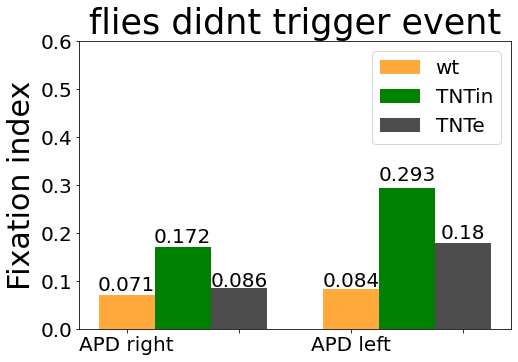

In [335]:

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, negative_fixation_data[0], color = '#ffaa3b',label='wt', width = 0.25)
ax.bar(X + 0.25, negative_fixation_data[1], color = 'g',label='TNTin', width = 0.25)
ax.bar(X + 0.5, negative_fixation_data[2], color = '#4d4d4d',label='TNTe', width = 0.25)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'APD right'
labels[3] = 'APD left'
plt.ylim(0.0, 0.6)
ax.legend(fontsize=20)
ax.set_title('flies didnt trigger event', fontsize=35)
ax.set_ylabel('Fixation index', fontsize=30)

plt.text (0, 0.09, '0.071', fontsize=20, ha='center', va='center')
plt.text (0.25, 0.19, '0.172', fontsize=20,ha='center', va='center')
plt.text (0.5, 0.1, '0.086', fontsize=20, ha='center', va='center')

plt.text (1, 0.1, '0.084', fontsize=20, ha='center', va='center')
plt.text (1.25, 0.32, '0.293', fontsize=20,ha='center', va='center')
plt.text (1.5, 0.2, '0.18', fontsize=20, ha='center', va='center')


ax.set_xticklabels(labels)
ax.tick_params(axis='both', labelsize = 20)
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/fixation_index_negative.pdf")

/Users/ambra-stella/opt/anaconda3/envs/flyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


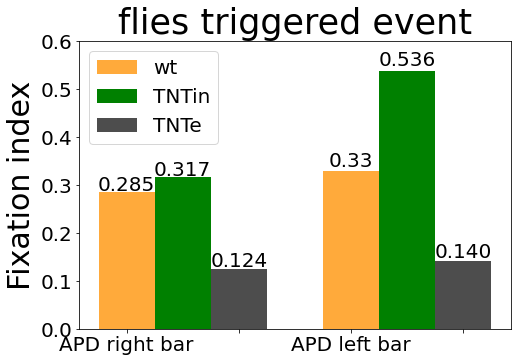

In [351]:
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, positive_fixation_data[0], color = '#ffaa3b',label='wt', width = 0.25)
ax.bar(X + 0.25, positive_fixation_data[1], color = 'g',label='TNTin', width = 0.25)
ax.bar(X + 0.50, positive_fixation_data[2], color = '#4d4d4d',label='TNTe', width = 0.25)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'APD right bar'
labels[3] = 'APD left bar'
ax.legend(fontsize=20)
ax.set_title('flies triggered event', fontsize=35)
ax.set_ylabel('Fixation index', fontsize=30)
ax.set_xticklabels(labels)

plt.text (0, 0.3, '0.285', fontsize=20, ha='center', va='center')
plt.text (0.25, 0.33, '0.317', fontsize=20,ha='center', va='center')
plt.text (0.5, 0.14, '0.124', fontsize=20, ha='center', va='center')

plt.text (1, 0.35, '0.33', fontsize=20, ha='center', va='center')
plt.text (1.25, 0.56, '0.536', fontsize=20,ha='center', va='center')
plt.text (1.5, 0.16, '0.140', fontsize=20, ha='center', va='center')

ax.tick_params(axis='both', labelsize = 20)
plt.ylim(0.0, 0.6)

plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/fixation_index_positive.pdf")

# swarm plot over boxplot:

In [ ]:
ax = sns.boxplot(x="total_bill", y="day", data=tips, whis=np.inf)
ax = sns.swarmplot(x="total_bill", y="day", data=tips, color=".2")

In [30]:
width = 0.5 
lables = []
for i in range(36):
    leer = i
    lables.append(i)
ax.bar(percentage_per_bin, lables, width, label='', color = ['#ffaa3b'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

No handles with labels found to put in legend.


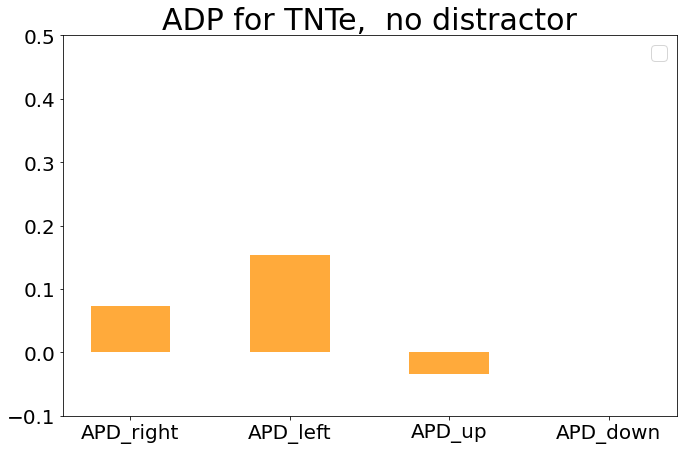

In [504]:
labels = ['APD_right', 'APD_left', 'APD_up','APD_down']
same_direction = (APD_right, APD_left, APD_up, APD_down)
#different_direction = [0.2, 0.3, 0.8]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(11,7))

ax.bar(labels, same_direction, width, label='', color = ['#ffaa3b'])
#ax.bar(labels, different_direction, width, bottom=same_direction,
       #label='different direction')

ax.set_ylabel('', fontsize=30)

#ax.set_xlabel(fontsize=12)
plt.ylim(-0.1, 0.5)
# plt.text (0, 18, '15.79%', fontsize=20, ha='center', va='center')
# plt.text (1, 49, '46.43%', fontsize=20,ha='center', va='center')
# plt.text (2, 32, '29.27%', fontsize=20, ha='center', va='center')
ax.set_title('ADP for TNTe,  no distractor', fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', labelsize = 20)
#plt.savefig("/Users/ambra-stella/bachelor/analysis/plots/TNTe_ADP_big_summary_negative.pdf")

# max artifact searcher:

In [177]:
maxi_objects = []
for i in range(len(angle_list)):
    liste_in_liste = angle_list[i]
    #print(liste_in_liste)
    try:
        maxi = max(liste_in_liste)
        maxi_objects.append(maxi)
    except:
        pass
    #print(maxi)
    #maxi_objects.append(maxi)
    #print(maxi_objects)    
  
    # for j in range(len(liste_in_liste)):
    #     objecte = liste_in_liste[j]
    #     objecte = int(objecte)
        #print('object number:',j, ' in array:',i, objecte)
        #print(type(objecte))
        
print(maxi_objects)
print(len(maxi_objects))

#print('lenght:',len(maxi))

[1309.0, 1207.0, 1086.0, 926.0, 865.0, 714.0, 753.0, 674.0, 593.0, 569.0, 514.0, 492.0, 500.0, 522.0, 521.0, 469.0, 465.0, 456.0, 459.0, 501.0, 766.0, 1107.0, 1573.0, 2150.0, 2214.0, 1658.0, 1864.0, 1904.0, 1641.0, 1140.0, 682.0, 534.0, 542.0, 500.0, 490.0, 485.0, 441.0, 433.0, 448.0, 489.0, 495.0, 508.0, 560.0, 609.0, 738.0, 893.0, 1255.0, 1673.0, 1888.0, 1497.0]
50


In [178]:
fly_position_in_list = []
for flies in range(len(single_fly_histogram_counts)):
    print('array number:', flies)
    arrays_in_array = single_fly_histogram_counts[flies]
    #print(arrays_in_array)
    mini_list = []
    print(list_flies[flies])
    
    for angle in range(len(arrays_in_array)):
        #print('position:',objects)
        if arrays_in_array[angle] == maxi_objects[angle]:
            print('angle_number:', angle)
            print('value of interest:', maxi_objects[angle])
            mini_list.append(flies)
        else:
            pass 
            
    fly_position_in_list.append(mini_list)
print(fly_position_in_list)
print(len(fly_position_in_list))

array number: 0
20210617_161252
array number: 1
20210629_164435
array number: 2
20210630_135219
array number: 3
20210617_124459
array number: 4
20210701_155119
angle_number: 0
value of interest: 1309.0
angle_number: 1
value of interest: 1207.0
angle_number: 2
value of interest: 1086.0
angle_number: 3
value of interest: 926.0
angle_number: 4
value of interest: 865.0
angle_number: 5
value of interest: 714.0
angle_number: 6
value of interest: 753.0
angle_number: 7
value of interest: 674.0
angle_number: 8
value of interest: 593.0
angle_number: 9
value of interest: 569.0
angle_number: 10
value of interest: 514.0
angle_number: 26
value of interest: 1864.0
angle_number: 27
value of interest: 1904.0
angle_number: 28
value of interest: 1641.0
angle_number: 29
value of interest: 1140.0
angle_number: 30
value of interest: 682.0
angle_number: 41
value of interest: 508.0
array number: 5
20210701_135110
angle_number: 11
value of interest: 492.0
angle_number: 12
value of interest: 500.0
angle_number:

flies: ['20210622_155754']
Number of flies: 1
fly at: 20210622_155754
[array([-0.03230346,  0.00711297]), array([-0.0363414 ,  0.01111549]), array([ 0.02387899, -0.01374247]), array([ 0.01895701, -0.0143022 ]), array([0.00748488, 0.02445095]), array([-0.02731948,  0.02406146]), array([-0.0234288 , -0.01878369]), array([-0.014843  ,  0.03088862]), array([0.00896009, 0.03569234]), array([0.02371124, 0.01860712]), array([0.03234347, 0.00998252]), array([ 0.0275661 , -0.00322674]), array([-0.00145208, -0.03087465]), array([-0.02650198, -0.02479411]), array([-0.03110529, -0.00944285]), array([-0.02449987, -0.01371852]), array([-0.01309949, -0.01735751]), array([ 0.01920272, -0.02681939]), array([ 0.01841197, -0.01527217]), array([ 0.01807871, -0.0133873 ]), array([ 0.02632458, -0.00025255]), array([0.0128547, 0.0048705]), array([-0.00087163,  0.0353672 ]), array([-0.02238521,  0.01695946]), array([-0.03242024,  0.01324605]), array([-0.02143084,  0.01284518]), array([-0.0087783 ,  0.01286587

/Users/ambra-stella/opt/anaconda3/envs/flyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


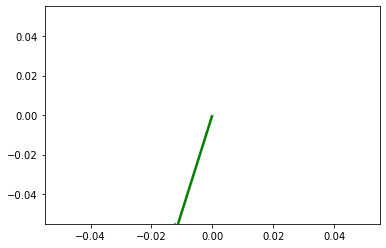

In [57]:
use_df = df[:1000]

list_flies = use_df['fly_number'].tolist()
list_flies = set(list_flies)
list_flies = list(list_flies)
print('flies:', list_flies)
print('Number of flies:', len(list_flies))


 ### defines fixiation bereiche ### 
fix_right_rad = 0.479965
fix_right_rad = float(fix_right_rad)
#print('fix_right_rad:', fix_right_rad)
fix_left_rad =  2.661627
fix_left_rad = float(fix_left_rad)
#print('fix_left_rad:', fix_left_rad)


for flies in list_flies:
        fly = use_df[use_df.fly_number == flies]
        #print(fly[:5])
        chunk_count= 0
        
        if fly.empty:
                pass
        else:
                chunk_vectors = []
                print('fly at:', flies)
                for chunk in np.array_split(fly, len(fly)//30):
                        #print('chunk at:', chunk_count)
                        chunk_count = chunk_count +1
                        #print('chunk at:', chunk_count)
                        coord = chunk[['x', 'y']]
                        #print('coords:', coord[:5])
                        coord = coord.to_numpy()
                        #print('coords after array:', coord[:5])
                        #print('yes')
                        #print('chunk length:', len(chunk))
        #print('number of chunks:', chunk_count)
                        
                        vectors = []
                        #### create vetores ### 
                        for i in range(len(coord)):
                                #print(i)
                                first = coord[[i]]
                                second = coord[i+1:i+2]
                                
                                # print(i,'first:', first)
                                # print(i,'second:', second)
                                
                                vector = second - first
                                vectors.append(vector)
                                
                                #print (vector)
                                
                        #print(vectors)
                        
                        chunk_vector_fly = [sum(x) for x in vectors]
                        chunk_vector_fly = np.array(chunk_vector_fly)
                        
                        # print('chunk vector:', chunk_vector_fly)
                        # print('type chunk vector:', type(chunk_vector_fly))
                        
                        chunk_vector_fly = sum(chunk_vector_fly)
                        # print('chunk vector:', chunk_vector_fly)
                        # print('type chunk vector:', type(chunk_vector_fly))
                        
                        chunk_vectors.append(chunk_vector_fly)
                print(chunk_vectors)
                #print(type(len(chunk_vectors)))
                
                chunk_vectors = np.array(chunk_vectors)
                print('chunk vector lenth:', len(chunk_vectors))
                print('try out',chunk_vectors[:,1])
                #print('chunk veto'type(len(chunk_vectors)))
                
                test = len(chunk_vectors)
                
                for x in chunk_vectors[:,0]:
                        x = x
                        
                for y in chunk_vectors[:,1]:
                        y = y
                
                arr = np.zeros((1,test))
                tail = [0,0]
                fig, ax = plt.subplots(1)
                ax.quiver(*tail,
                        x,
                        y,
                        scale=0.1,
                        color=['g', 'r', 'k'])
 
                #ax.set_xlim((-1, chunk_vectors[:,0].max()+1))
                #ax.set_ylim((-1, chunk_vectors[:,1].max()+1))
                
                
                
                
                #         if last_bar_angle > 0: #POSITIV
                #                 if chunk_angle < right_rad: #SMALLER
                #                         #print('right')
                #                         clipped_reaction.loc[(clipped_reaction.timing == 'after') & (clipped_reaction.distraction_index == index) & (clipped_reaction.fly_number == flies), 'reaction_direction'] = 'right'
                #                         break
                     
                #                 elif chunk_angle > left_rad: #BIGGER
                #                         #print('left')
                #                         clipped_reaction.loc[(clipped_reaction.timing == 'after') & (clipped_reaction.distraction_index == index) & (clipped_reaction.fly_number == flies), 'reaction_direction'] = 'left'
                #                         break
                
                #         elif last_bar_angle < 0: #NEGATIV
                #                 if chunk_angle > left_rad: #BIGGER
                #                         #print('right')
                #                         clipped_reaction.loc[(clipped_reaction.timing == 'after') & (clipped_reaction.distraction_index == index) & (clipped_reaction.fly_number == flies), 'reaction_direction'] = 'right'
                #                         break
                #                 elif chunk_angle < right_rad: #SMALLER
                #                         #print('left')
                #                         clipped_reaction.loc[(clipped_reaction.timing == 'after') & (clipped_reaction.distraction_index == index) & (clipped_reaction.fly_number == flies), 'reaction_direction'] = 'left'
                #                         break
                #         else:
                                #print('no decition')
                                #clipped_reaction.loc[(clipped_reaction.timing == 'after') & (clipped_reaction.distraction_index == index) & (clipped_reaction.fly_number == flies), 'reaction_direction'] = 'other'

In [8]:
test = 33
np.array((test, np.zeros((2,)) ) )

/Users/ambra-stella/opt/anaconda3/envs/flyvenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


array([33, array([0., 0.])], dtype=object)

In [17]:
test = 33
arr = np.zeros((2,))
zero_array_list =[]
for numbers in range(test):
    arr = np.empty((2,))
    zero_array_list.append(arr)
#print('list:', zero_array_list)
zero_array = np.array(zero_array_list)
zero_array

list: [array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.])]


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
np.zeros((1,33))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])